October: This notebook is a continuation of gyre_runs.ipynb, with specific interest in Mackenzie Canyon runs.

In [3]:
import netCDF4 as nc
import numpy as np
from netCDF4 import Dataset
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import Image, display
%matplotlib inline

| parameter |    1    |   2  |   3   |  4    |   5  |  6 |   7   |   8  | 9 |     10     |   11  |     12    |
|:---------:|:-------:|:----:|:-----:|:-----:|:----:|:--:|:-----:|:----:|:-:|:----------:|:-----:|:---------:|
| rn_rdt    | 2 h     | 2 h  |**8 h**|**3 m**| -    | -  | -     | 15 s | - | **10 s**   | 2 h   | **10 s**  |
| nn_itend  | 360 d   | 10 d | 352 d | 1 d   | -    | -  | -     | 6 h  | - | 6 h        | 360 d | 6 h       |
| nn_write  | 5d      | -    | -     | -     | -    | -  | -     | -    | - | 6 h        | 5 d   | 1 h       |
| nn_tau000 | 100     | -    | -     | -     | -    | 20 | -     | -    | - | 20         | 100   | 100       |
| ztau      | 0.105   | -    | -     | -     | 0.01 | -  | -     | -    | 0 | 0          | **0** | **0**     |
| ztau_sais | 0.015   | -    | -     | -     | -    | -  | 0.001 | -    | 0 | 0          | **0** | **0**     |
| kt        | 1       | 1    | 3     | 9     | 9    | 9  | 9     | X    | 1 | complete*  | X     | complete! |

1. \* (gyre runs but no output files) ! (gyre runs and produces output)
2. kt = ocean time step - in this table, at which the model explodes
3. The spacing ratio tells me the timestep ratio should be 3 m
4. The timestep in nemo must be an even number
5. Reducing the forcing to zero isn't enough, you need to lower the timestep

In [4]:
gridT = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/gyre_mackenzie01/EXP00/GYRE_1h_00010101_00010101_grid_T.nc')
gridU = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/gyre_mackenzie01/EXP00/GYRE_1h_00010101_00010101_grid_U.nc')
gridV = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/gyre_mackenzie01/EXP00/GYRE_1h_00010101_00010101_grid_V.nc')
gridW = nc.Dataset('/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/gyre_mackenzie01/EXP00/GYRE_1h_00010101_00010101_grid_W.nc')

In [5]:
tem = gridT.variables['votemper']
sal = gridT.variables['vosaline']
ssh = gridT.variables['sossheig']
U = gridU.variables['vozocrtx']
V = gridV.variables['vomecrty']
W = gridW.variables['vovecrtz']
lon = gridT.variables['nav_lon']
lat = gridT.variables['nav_lat']

In [6]:
def plot_mackenzie01_results(var, dep, cmin, cmax, cmaps):
    fig, (ax1 ,ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
    for ax, i in zip([ax1, ax2, ax3], [1,3,5]):
        c = ax.pcolormesh(lon, lat, var[i,9,:,:], cmap=cmaps, vmin = cmin, vmax = cmax) # depth = 135.84467 m
        cbar = fig.colorbar(c, ax=ax)
        cbar.set_clim(cmin,cmax)
        ax.set_title('time ' + str(i))
    return fig

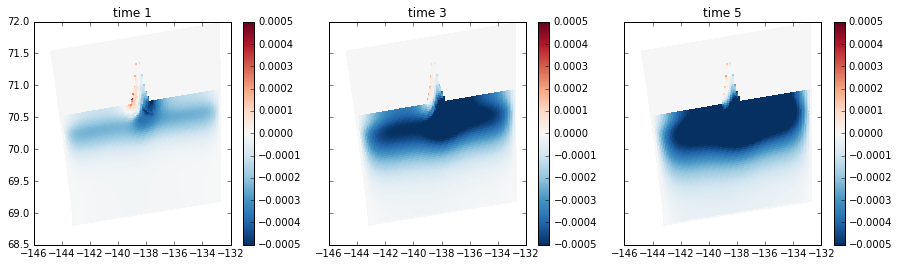

In [7]:
fig = plot_mackenzie01_results(U, 7, -0.0005, 0.0005, cm.RdBu_r) # -0.0006 0.0003

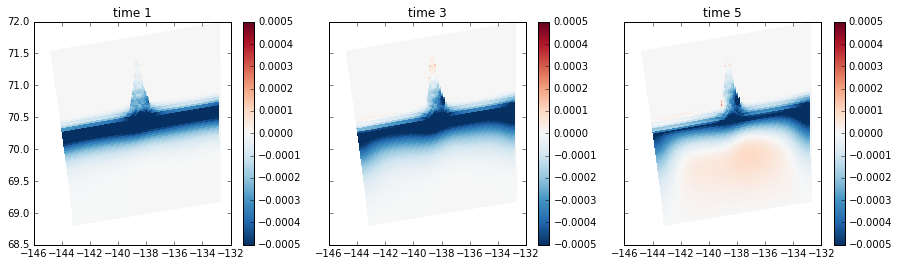

In [8]:
fig = plot_mackenzie01_results(V, 7, -0.0005, 0.0005, cm.RdBu_r) # -0.0009 0.00015

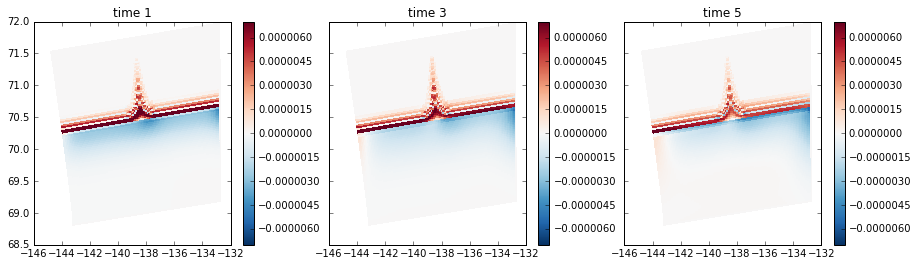

In [9]:
fig = plot_mackenzie01_results(W, 7, -0.000007, 0.000007, cm.RdBu_r) #-0.000004, 0.00001

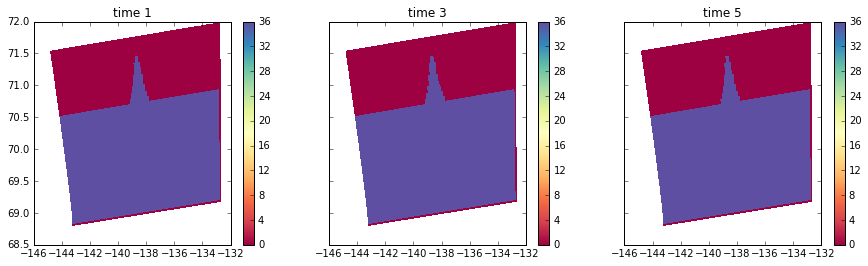

In [10]:
fig = plot_mackenzie01_results(sal, 7, 0, 36, cm.Spectral)